# Easy
Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
tit_pass = pd.read_csv('/home/euegene/learn/DS_Learn/Data/train.csv')
tit_pass

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
count_prc = round((tit_pass[tit_pass['Age']<18]['Name'].count() * 100/tit_pass['Age'].count()),2)
print('Детей на Титанике было ', count_prc ,'%' , 'от общего числа пассажиров')
rel = round((tit_pass[tit_pass['Sex'] == 'male']['Name'].count() / tit_pass[tit_pass['Sex'] == 'female']['Name'].count()),2)
print('Cоотношение мужчин/женщин на борту ', rel )

Детей на Титанике было  15.83 % от общего числа пассажиров
Cоотношение мужчин/женщин на борту  1.84


# Normal
Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили.

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [6]:
print(tit_pass['Age'].isnull().sum() , 'пассажиров не имеет данных о возрасте и',tit_pass['Sex'].isnull().sum() , 'пассажиров не имеет данных о поле')

177 пассажиров не имеет данных о возрасте и 0 пассажиров не имеет данных о поле


<AxesSubplot:xlabel='Sex', ylabel='Age'>

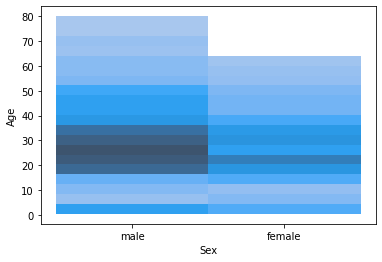

In [7]:
sns.histplot(data = tit_pass , x = 'Sex', y = 'Age')

In [8]:
count_all = tit_pass['Name'].count()
count_female = (tit_pass[(tit_pass['Sex'] == 'female') & (tit_pass['Survived'] == 1)]['Name'].count() *100/count_all)
count_male = (tit_pass[(tit_pass['Sex'] == 'male') & (tit_pass['Survived'] == 1)]['Name'].count()  *100/count_all)
count_child = (tit_pass[(tit_pass['Age'] < 18) & (tit_pass['Survived'] == 1)]['Name'].count() *100/count_all)

In [9]:
print('Соотношение выживших: дети',round(count_child,0),'%,','Женщины ',round(count_female,0),'%,','Мужчины',round(count_male,0),'%' )

Соотношение выживших: дети 7.0 %, Женщины  26.0 %, Мужчины 12.0 %


In [35]:
life_age = tit_pass.groupby(['Age'])['Survived'].count().reset_index()

In [36]:
life_age.corr() #Находим корреляцию между возрастом и выживаемостью

,Age,Survived
Age,1.000000,-0.198554
Survived,-0.198554,1.000000


In [37]:
life_sex = tit_pass.groupby(['Sex'])['Survived'].count().reset_index()

In [41]:
life_sex.corr() #Находим корреляцию между полом и выживаемостью

,Survived
Survived,1.0
